# Sheet 5

In [1]:
import os
import pandas as pd

## 2 Logistic regression: an LLM lie detector

Download the data from https://heibox.uni-heidelberg.de/f/38bd3f2a9b7944248cc2/   
Unzip it and place the lie_detection folder in the folder named `data` to get the following structure:
"data/lie_detection/datasets" and "data/lie_detection/acts".

This is how you can load a dataset of LLM activations. Use a new Datamanager if you want to have a new dataset. Use the same data manager if you want to combine datasets.

In [3]:
from lie_detection_utils import DataManager

path_to_datasets = "data/lie_detection/datasets"
path_to_acts = "data/lie_detection/acts"

# check if the datasets and activations are available
assert os.path.exists(path_to_datasets), "The path to the datasets does not exist."
assert os.path.exists(path_to_acts), "The path to the activations does not exist."

# these are the different datasets containing true and false factual statements about different topics
dataset_names = ["cities", "neg_cities", "sp_en_trans", "neg_sp_en_trans"]
dataset_name = dataset_names[0] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

# the dataloader automatically loads the training data for us
dm = DataManager()
dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train, labels_train = dm.get('train') # train set
acts_test, labels_test = dm.get('val')
print(acts_train.shape, labels_train.shape)

torch.Size([1196, 4096]) torch.Size([1196])


In [ ]:
# have a look at the statements that were fed to the LLM to produce the activations:
df = pd.read_csv(f"{path_to_datasets}/{dataset_name}.csv")
print(df.head(10))

### a)

In [14]:
from sklearn.linear_model import LogisticRegression

for i in range(len(dataset_names)):

    dataset_name = dataset_names[i] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

# the dataloader automatically loads the training data for us
    dm = DataManager()
    dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
    acts_train, labels_train = dm.get('train') # train set
    acts_test, labels_test = dm.get('val')

    # train classifier
    clf = LogisticRegression(random_state=0,penalty = None).fit(acts_train, labels_train)
    clf.predict(acts_test)
    print(clf.score(acts_test,labels_test))

1.0
1.0
1.0
1.0


### b)

In [15]:
dataset_name = dataset_names[0] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

# the dataloader automatically loads the training data for us
dm = DataManager()
dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
            device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train, labels_train = dm.get('train') # train set
acts_test, labels_test = dm.get('val')
clf = LogisticRegression(random_state=0,penalty = None).fit(acts_train, labels_train)

for i in range(1,len(dataset_names)):

    dataset_name = dataset_names[i] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

    # the dataloader automatically loads the training data for us
    dm = DataManager()
    dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
    acts_train, labels_train = dm.get('train') # train set
    acts_test, labels_test = dm.get('val')

    # test classifier
    clf.predict(acts_test)
    print(clf.score(acts_test,labels_test))

0.52
0.8028169014084507
0.4647887323943662


In [16]:
dataset_name = dataset_names[0] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

# the dataloader automatically loads the training data for us
dm = DataManager()
dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
            device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train, labels_train = dm.get('train') # train set
acts_test, labels_test = dm.get('val')
clf = LogisticRegression(random_state=0,penalty = "l2").fit(acts_train, labels_train)

for i in range(1,len(dataset_names)):

    dataset_name = dataset_names[i] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

    # the dataloader automatically loads the training data for us
    dm = DataManager()
    dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
    acts_train, labels_train = dm.get('train') # train set
    acts_test, labels_test = dm.get('val')

    # test classifier
    clf.predict(acts_test)
    print(clf.score(acts_test,labels_test))

0.45666666666666667
1.0
0.49295774647887325


### c)

In [17]:
dataset_name1 = dataset_names[0] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example
dataset_name2 = dataset_names[1] 
# the dataloader automatically loads the training data for us
dm = DataManager()
dm.add_dataset(dataset_name1, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
            device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
dm.add_dataset(dataset_name2, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
            device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train, labels_train = dm.get('train') # train set
acts_test, labels_test = dm.get('val')
clf = LogisticRegression(random_state=0,penalty = "l2").fit(acts_train, labels_train)

for i in range(2,len(dataset_names)):

    dataset_name = dataset_names[i] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

    # the dataloader automatically loads the training data for us
    dm = DataManager()
    dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
    acts_train, labels_train = dm.get('train') # train set
    acts_test, labels_test = dm.get('val')

    # test classifier
    clf.predict(acts_test)
    print(clf.score(acts_test,labels_test))

1.0
0.9859154929577465


## 3 Log-sum-exp and soft(arg)max
### (b)

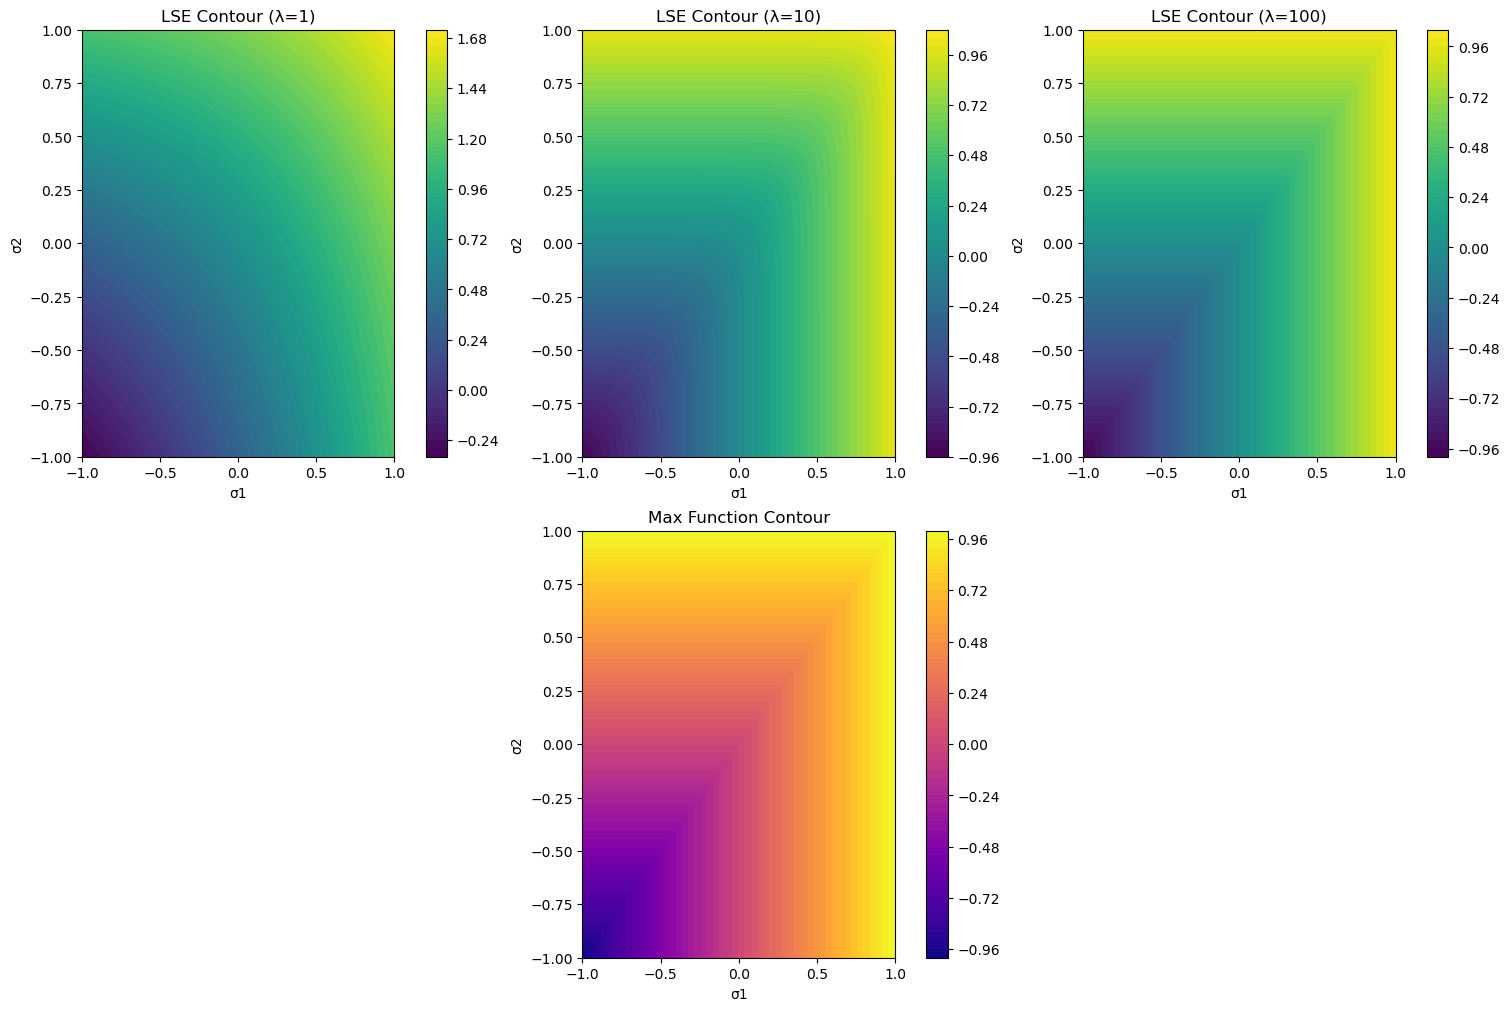

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the LSE function
def lse(sigma1, sigma2, lambd):
    return (1 / lambd) * np.log(np.exp(lambd * sigma1) + np.exp(lambd * sigma2))

# Define the max function
def max_func(sigma1, sigma2):
    return np.maximum(sigma1, sigma2)

# Generate a grid of sigma1 and sigma2 values
sigma1 = np.linspace(-1, 1, 500)
sigma2 = np.linspace(-1, 1, 500)
sigma1_grid, sigma2_grid = np.meshgrid(sigma1, sigma2)

# Compute the max function values
max_values = max_func(sigma1_grid, sigma2_grid)

# Compute LSE for different values of lambda
lambdas = [1, 10, 100]
lse_values = {l: lse(sigma1_grid, sigma2_grid, l) for l in lambdas}

# Plot the contours
fig, axes = plt.subplots(2, len(lambdas), figsize=(15, 10), constrained_layout=True)

# Plot LSE contours
for i, l in enumerate(lambdas):
    cs = axes[0, i].contourf(sigma1_grid, sigma2_grid, lse_values[l], levels=50, cmap='viridis')
    axes[0, i].set_title(f"LSE Contour (λ={l})")
    axes[0, i].set_xlabel("σ1")
    axes[0, i].set_ylabel("σ2")
    fig.colorbar(cs, ax=axes[0, i])

# Plot max function contours
cs = axes[1, 1].contourf(sigma1_grid, sigma2_grid, max_values, levels=50, cmap='plasma')
axes[1, 1].set_title("Max Function Contour")
axes[1, 1].set_xlabel("σ1")
axes[1, 1].set_ylabel("σ2")
fig.colorbar(cs, ax=axes[1, 1])

# Clear unnecessary axes in second row
axes[1, 0].axis('off')
axes[1, 2].axis('off')

plt.show()


### (c)

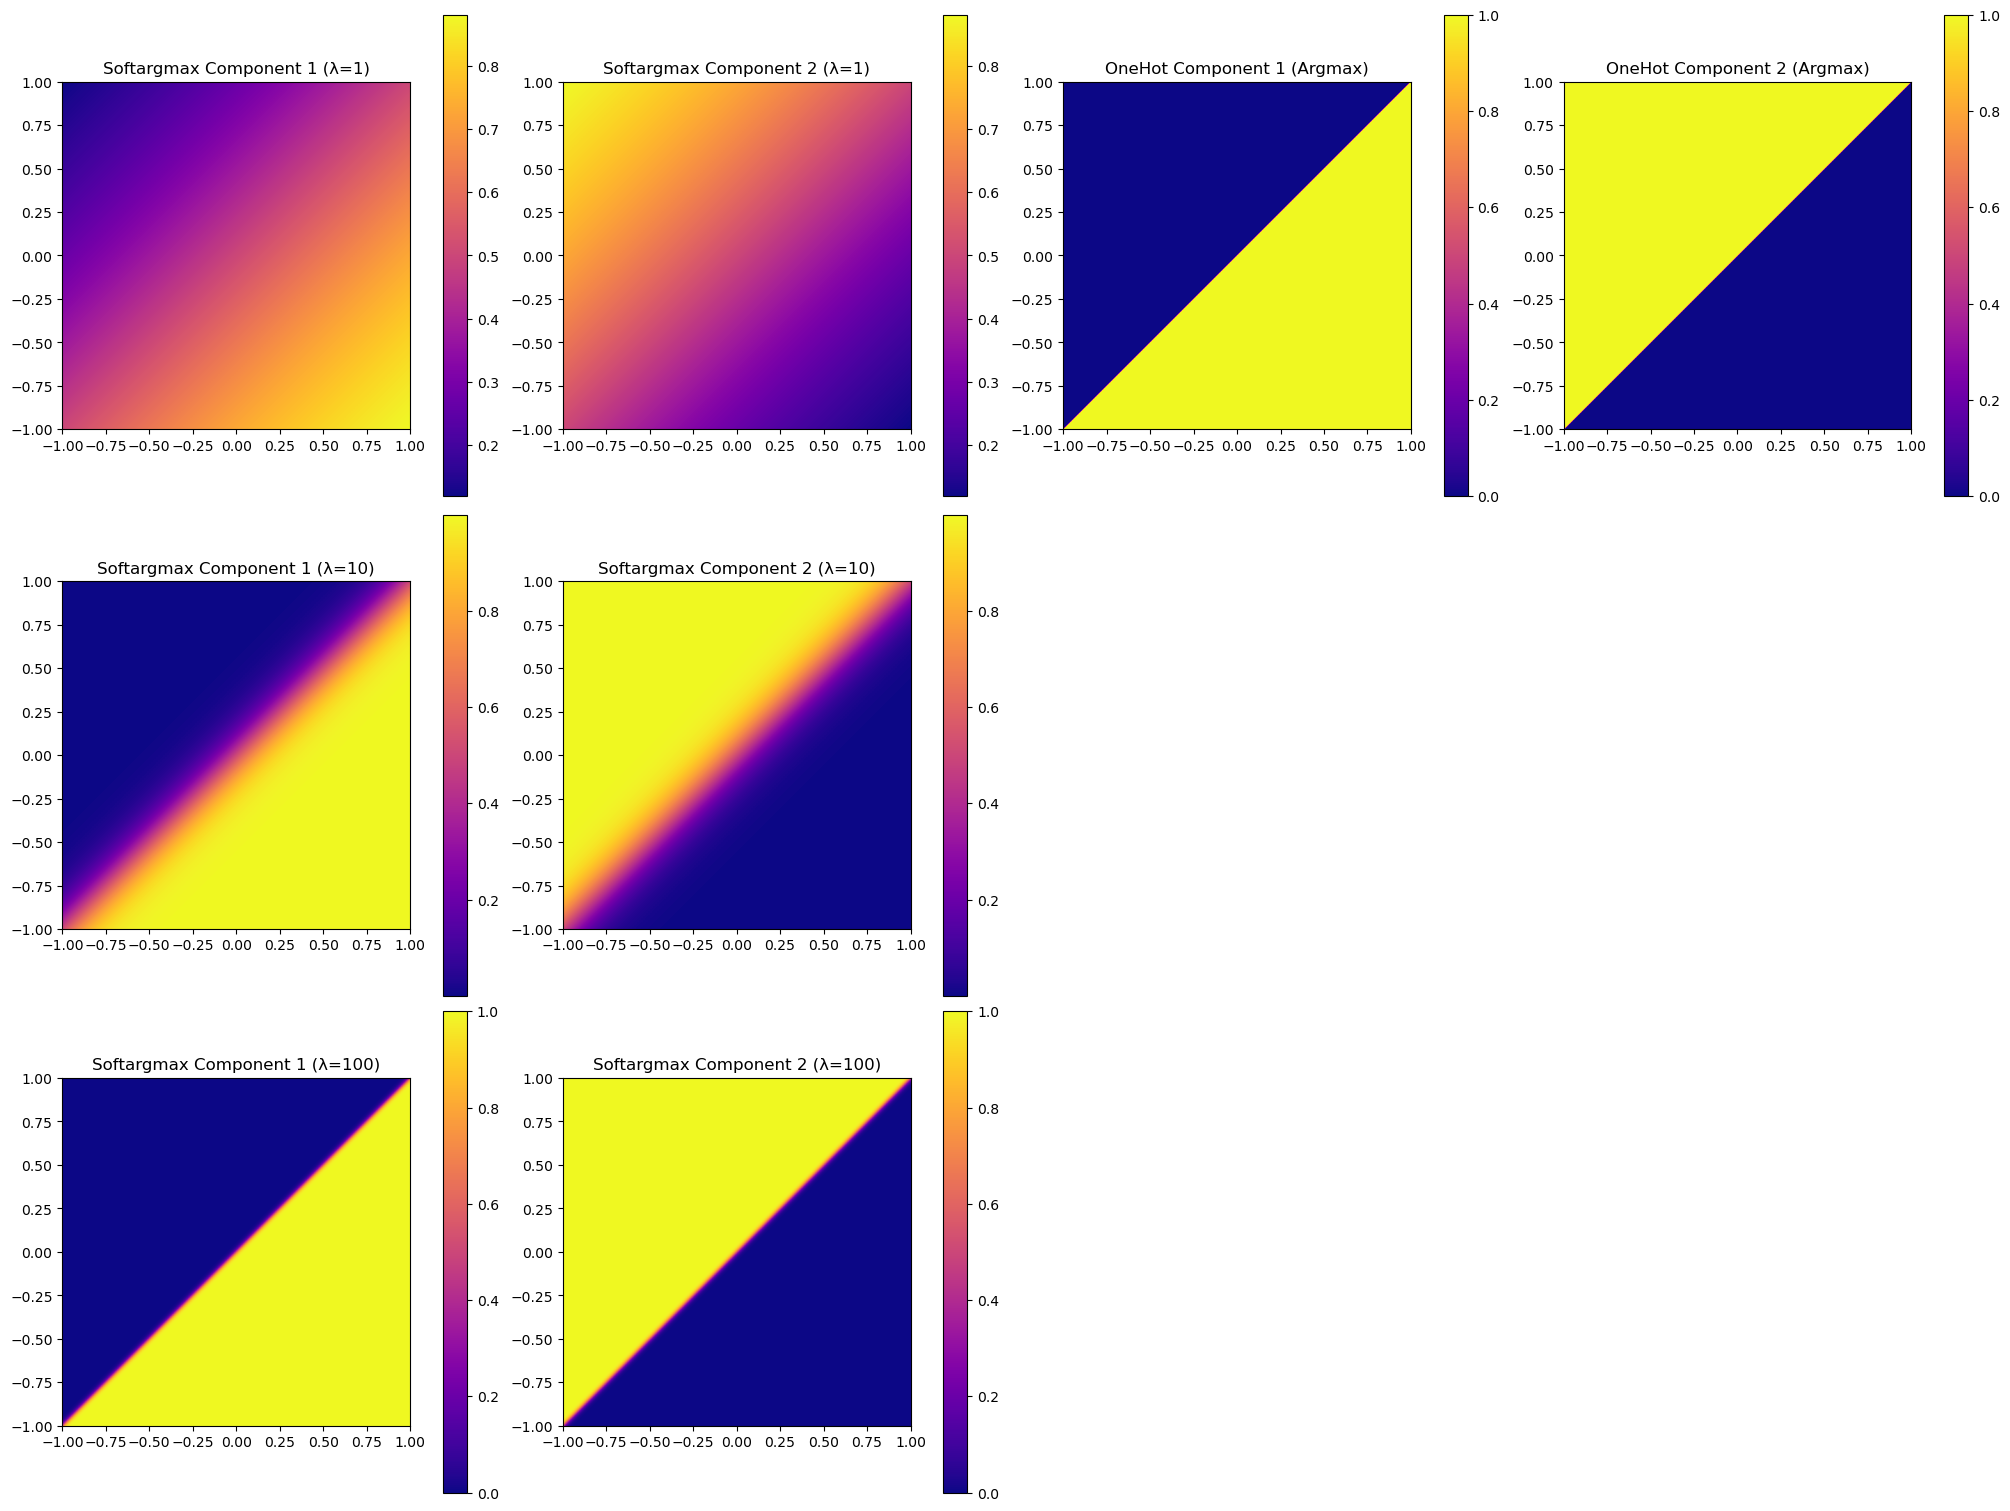

In [20]:
# Re-importing libraries as the environment was reset
import numpy as np
import matplotlib.pyplot as plt

# Define the softmax components
def softargmax_components(sigma1, sigma2, lambd):
    exp1 = np.exp(lambd * sigma1)
    exp2 = np.exp(lambd * sigma2)
    total = exp1 + exp2
    return exp1 / total, exp2 / total

# Define the one-hot components for argmax
def onehot_argmax_components(sigma1, sigma2):
    mask1 = sigma1 > sigma2  # First component of the one-hot vector
    mask2 = ~mask1           # Second component of the one-hot vector (opposite of mask1)
    return mask1.astype(float), mask2.astype(float)

# Generate a grid of sigma1 and sigma2 values
sigma1 = np.linspace(-1, 1, 500)
sigma2 = np.linspace(-1, 1, 500)
sigma1_grid, sigma2_grid = np.meshgrid(sigma1, sigma2)

# Compute softargmax and one-hot components
lambdas = [1, 10, 100]
softargmax_results = {l: softargmax_components(sigma1_grid, sigma2_grid, l) for l in lambdas}
onehot_results = onehot_argmax_components(sigma1_grid, sigma2_grid)

# Plot the results
fig, axes = plt.subplots(len(lambdas), 4, figsize=(20, 15), constrained_layout=True)

for i, l in enumerate(lambdas):
    # Softargmax components
    comp1, comp2 = softargmax_results[l]
    im1 = axes[i, 0].imshow(comp1, extent=[-1, 1, -1, 1], origin='lower', cmap='plasma')
    im2 = axes[i, 1].imshow(comp2, extent=[-1, 1, -1, 1], origin='lower', cmap='plasma')
    axes[i, 0].set_title(f"Softargmax Component 1 (λ={l})")
    axes[i, 1].set_title(f"Softargmax Component 2 (λ={l})")
    fig.colorbar(im1, ax=axes[i, 0])
    fig.colorbar(im2, ax=axes[i, 1])

# One-hot components
comp1_onehot, comp2_onehot = onehot_results
im3 = axes[0, 2].imshow(comp1_onehot, extent=[-1, 1, -1, 1], origin='lower', cmap='plasma')
im4 = axes[0, 3].imshow(comp2_onehot, extent=[-1, 1, -1, 1], origin='lower', cmap='plasma')
axes[0, 2].set_title("OneHot Component 1 (Argmax)")
axes[0, 3].set_title("OneHot Component 2 (Argmax)")
fig.colorbar(im3, ax=axes[0, 2])
fig.colorbar(im4, ax=axes[0, 3])

# Clear unused axes in rows for one-hot (λ only affects softargmax)
for row in range(1, len(lambdas)):
    axes[row, 2].axis('off')
    axes[row, 3].axis('off')

plt.show()


## 4 Linear regions of MLPs
### a)

In [47]:
from torch import nn
import torch

class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(2,20),
      nn.ReLU(),
      nn.Linear(20,1)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

mlp = MLP()
params = sum(p.numel() for p in mlp.parameters())
print(f"Number of parameters: {params}")
  

Number of parameters: 81


### b)

In [62]:
class nn_output_analyzer():
    def __init__(self,model,n_points):
        self.model = model
        self.num_points = n_points


    def grid(self):
        # Create grid of points
        x = np.linspace(-10, 10, self.num_points)
        y = np.linspace(-10, 10, self.num_points)
        X, Y = np.meshgrid(x, y)
        
        # Prepare input for the model
        grid_points = np.column_stack((X.ravel(), Y.ravel()))
        grid_points_tensor = torch.FloatTensor(grid_points)
        
        # Evaluate model
        self.model.eval()
        with torch.no_grad():
            Z = self.model(grid_points_tensor).numpy().reshape(self.num_points, self.num_points)
        self.Z = Z
        # Create visualization
        plt.figure(figsize=(10, 8))
        plt.imshow(Z, extent=[-10, 10, -10, 10] ,
                   origin='lower', cmap='viridis')
        plt.colorbar(label='Model Output')
        plt.title(f'Neural Network Output (Range: [{-10}, {10}])')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    def grad(self):
              # Compute spatial gradients
        dy, dx = np.gradient(self.Z)
        
        # Create subplots for visualization
        fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(20, 6))
        
        # Plot x-component of gradient
        im2 = ax2.imshow(dx,  extent=[-10, 10, -10, 10], 
                         origin='lower', cmap='prism')
        ax2.set_title('Gradient (x-component)')
        ax2.set_xlabel('x')
        ax2.set_ylabel('y')
        plt.colorbar(im2, ax=ax2, label='∂f/∂x')
        
        # Plot y-component of gradient
        im3 = ax3.imshow(dy,  extent=[-10, 10, -10, 10], 
                         origin='lower', cmap='prism')
        ax3.set_title('Gradient (y-component)')
        ax3.set_xlabel('x')
        ax3.set_ylabel('y')
        plt.colorbar(im3, ax=ax3, label='∂f/∂y')
        
        plt.tight_layout()
        plt.show()

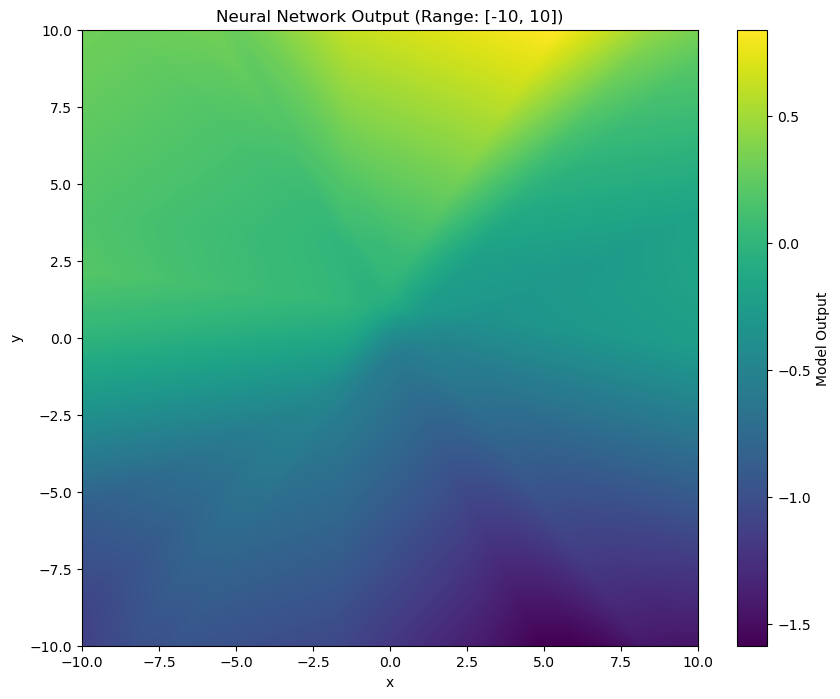

In [63]:
analyze = nn_output_analyzer(mlp,n_points=500)
analyze.grid()

### c)

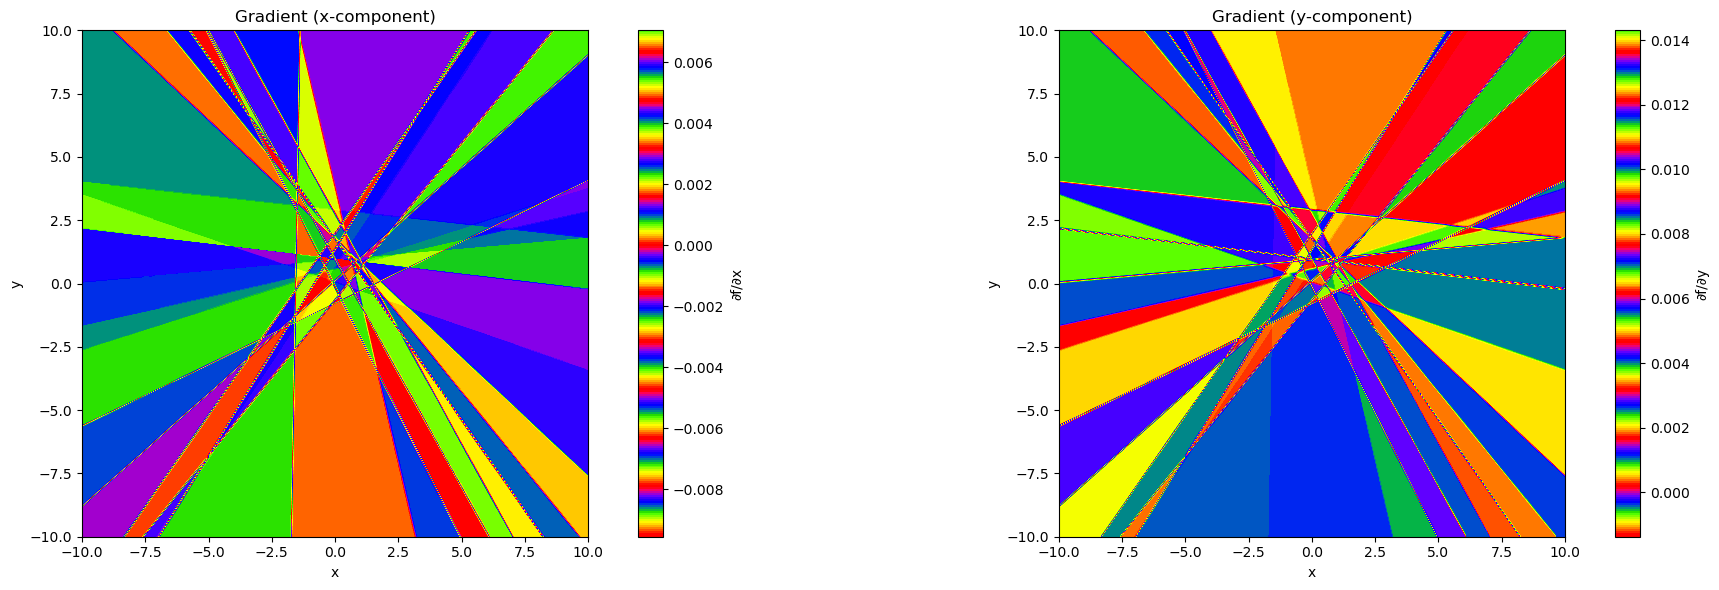

In [64]:
analyze.grad()

### d)

In [67]:
class MLP2(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(2,5),
      nn.ReLU(),
      nn.Linear(5,5),
      nn.ReLU(),
      nn.Linear(5,5),
      nn.ReLU(),
      nn.Linear(5,5),
      nn.ReLU(),
      nn.Linear(5,1)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

mlp2 = MLP2()
params = sum(p.numel() for p in mlp.parameters())
print(f"Number of parameters: {params}")
  

Number of parameters: 81


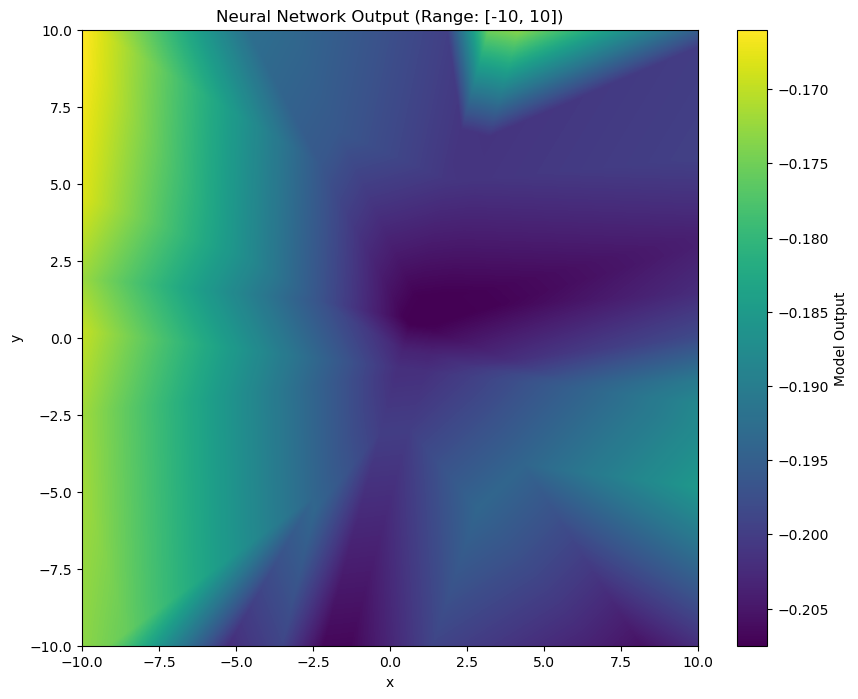

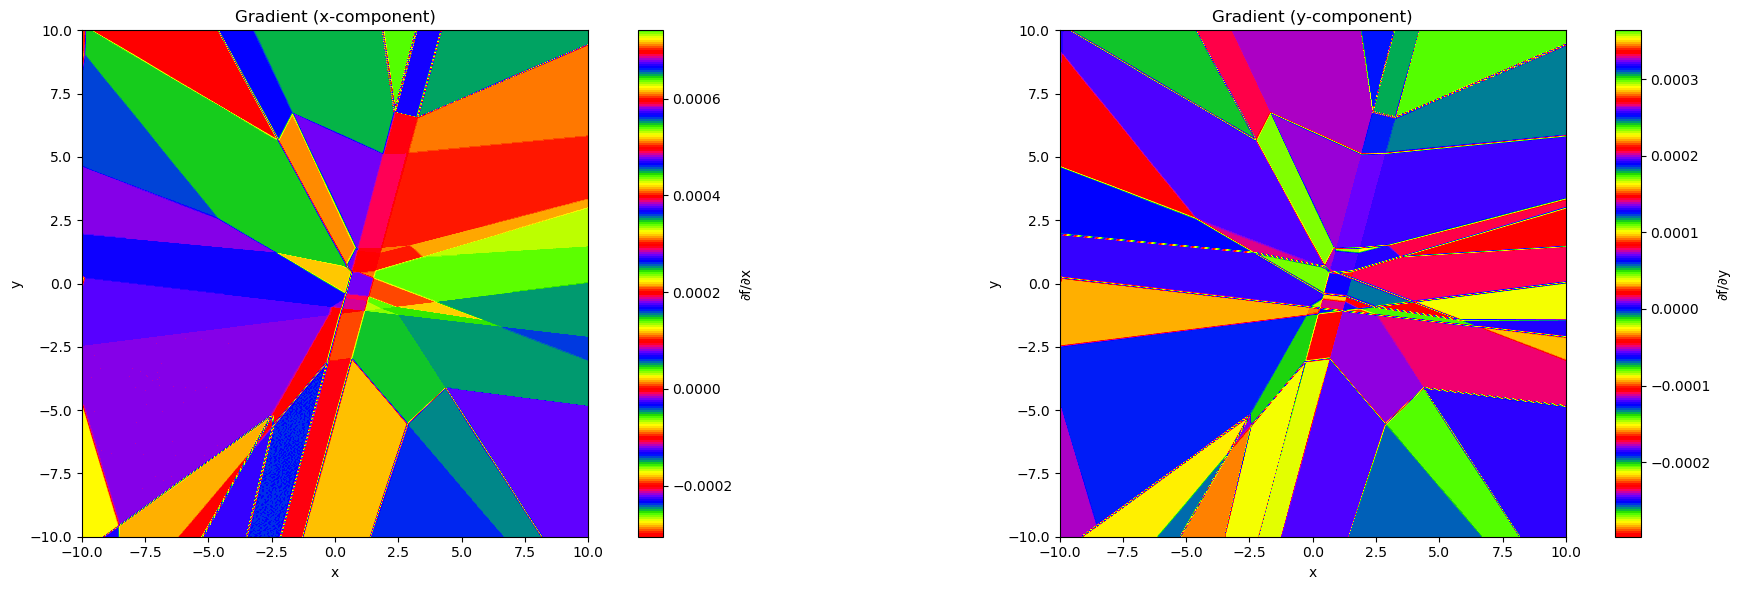

In [68]:
analyze = nn_output_analyzer(mlp2,n_points=500)
analyze.grid()
analyze.grad()